# Bangalore House Price Prediction

## Load the necessary libraries and the dataset

In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df=pd.read_csv('Bengaluru_House_Data.csv')

In [5]:
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


## Exploratory Data Analysis

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 624.4+ KB


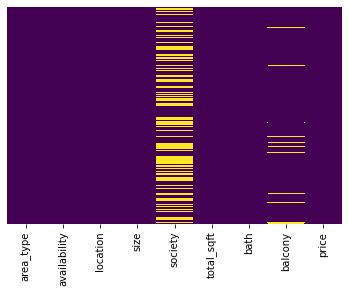

In [7]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [8]:
df['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [9]:
df['availability'].value_counts()

Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
16-Jan               1
17-Jan               1
15-Jun               1
14-Jul               1
15-Dec               1
Name: availability, Length: 81, dtype: int64

In [10]:
df['size'].value_counts()

2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
10 BHK           2
11 Bedroom       2
11 BHK           2
18 Bedroom       1
43 Bedroom       1
12 Bedroom       1
27 BHK           1
14 BHK           1
13 BHK           1
16 BHK           1
19 BHK           1
Name: size, dtype: int64

In [11]:
df['society'].value_counts()

GrrvaGr    80
PrarePa    76
Prtates    59
Sryalan    59
GMown E    56
           ..
Pranai      1
7 ise P     1
Keorai      1
Prarkll     1
AdndeBe     1
Name: society, Length: 2688, dtype: int64

In [12]:
df['bath'].value_counts().sort_index()

1.0      788
2.0     6908
3.0     3286
4.0     1226
5.0      524
6.0      273
7.0      102
8.0       64
9.0       43
10.0      13
11.0       3
12.0       7
13.0       3
14.0       1
15.0       1
16.0       2
18.0       1
27.0       1
40.0       1
Name: bath, dtype: int64

In [13]:
df.loc[df['bath']==40]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
4684,Plot Area,Ready To Move,Munnekollal,43 Bedroom,NaN,2400,40.0,0.0,660.0


In [14]:
df['location'].value_counts()

Whitefield                   540
Sarjapur  Road               399
Electronic City              302
Kanakpura Road               273
Thanisandra                  234
                            ... 
Indiranagar HAL 2nd Stage      1
Yelahanka,MVIT college         1
Vikram Nagar                   1
T.C. Palya                     1
Hanumagiri                     1
Name: location, Length: 1305, dtype: int64

### Conclusion
From the above explorations we can see that we have a lot of outliers in our dataset and those needs to be dropped or fixed. We also need to handle the categorical features and the missing values.

## Data Cleaning

In [15]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

### Society
Since a majority of the rows in the society columns are blank therefore we will drop it to avoid confusion.

In [16]:
df=df.drop('society', axis=1)

### Bath and Balcony
We will impute the missing values of the bath and balcony columns using the median of the respective columns.

In [17]:
from math import floor

bath_median = float(floor(df.bath.median()))
balcony_median = float(floor(df.balcony.median()))

df.balcony = df.balcony.fillna(balcony_median)
df.bath = df.bath.fillna(bath_median)

In [18]:
df.isnull().sum()

area_type        0
availability     0
location         1
size            16
total_sqft       0
bath             0
balcony          0
price            0
dtype: int64

#### Now we will drop the remaining null columns as they are only 17 in number and it wont affect the dataset much!

In [19]:
df=df.dropna()

### Size
Now we will convert the size column to bhk as it is not possible for the model to learn from categorical features

In [20]:
df['bhk']=df['size'].apply(lambda x:int(x.split()[0]))
df=df.drop('size', axis=1)

In [21]:
df

,area_type,availability,location,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,1056,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,2600,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,1440,2.0,3.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,1521,3.0,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,1200,2.0,1.0,51.00,2
...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,3453,4.0,0.0,231.00,5
13316,Super built-up Area,Ready To Move,Richards Town,3600,5.0,2.0,400.00,4
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,1141,2.0,1.0,60.00,2
13318,Super built-up Area,18-Jun,Padmanabhanagar,4689,4.0,1.0,488.00,4


### total_sqft
From the below cells we can see that the total_sqft columns are an object data and some also includes ranges. So our job will be to convert these objects to float and for ranges we will take the average.

In [22]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [23]:
def myFloat(x):
    try:
        float(x)
    except:
        return False
    return True

In [24]:
df[~df['total_sqft'].apply(myFloat)]

,area_type,availability,location,total_sqft,bath,balcony,price,bhk
30,Super built-up Area,19-Dec,Yelahanka,2100 - 2850,4.0,0.0,186.000,4
56,Built-up Area,20-Feb,Devanahalli,3010 - 3410,2.0,2.0,192.000,4
81,Built-up Area,18-Oct,Hennur Road,2957 - 3450,2.0,2.0,224.500,4
122,Super built-up Area,18-Mar,Hebbal,3067 - 8156,4.0,0.0,477.000,4
137,Super built-up Area,19-Mar,8th Phase JP Nagar,1042 - 1105,2.0,0.0,54.005,2
...,...,...,...,...,...,...,...,...
12990,Super built-up Area,18-May,Talaghattapura,1804 - 2273,3.0,0.0,122.000,3
13059,Super built-up Area,Ready To Move,Harlur,1200 - 1470,2.0,0.0,72.760,2
13240,Super built-up Area,Ready To Move,Devanahalli,1020 - 1130,2.0,2.0,52.570,1
13265,Super built-up Area,20-Sep,Hoodi,1133 - 1384,2.0,0.0,59.135,2


In [25]:
def sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [26]:
df['total_sqft']=df['total_sqft'].apply(sqft_to_num)

In [27]:
df=df.dropna()

## Feature Enginnering

#### Adding a new column price_per_sqft

In [28]:
df['price_per_sqft']=(df['price']*100000)/df['total_sqft']

<ipython-input-28-bd2f4dc8bf46>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_per_sqft']=(df['price']*100000)/df['total_sqft']


In [29]:
df.head()

,area_type,availability,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000


#### Converting least probable locations to other

In [30]:
df.location=df.location.apply(lambda x: x.strip())

C:\Users\Hrishikesh\AppData\Roaming\Python\Python38\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [31]:
location_stats = df.groupby('location')['location'].agg('count').sort_values(ascending=False)
locations_less_than_10 = location_stats[location_stats<=10]

In [32]:
df.location = df.location.apply(lambda x: 'other' if x in locations_less_than_10 else x)

In [33]:
df['location'].value_counts()

other              2873
Whitefield          538
Sarjapur  Road      397
Electronic City     304
Kanakpura Road      271
                   ... 
Marsur               11
Bommenahalli         11
Banjara Layout       11
HAL 2nd Stage        11
Nehru Nagar          11
Name: location, Length: 241, dtype: int64

#### Availability

In [34]:
df.loc[df['availability']!='Ready To Move', 'availability']='unavailable'

C:\Users\Hrishikesh\AppData\Roaming\Python\Python38\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [35]:
df.loc[df['availability']!='Ready To Move'].head()

,area_type,availability,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,unavailable,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
6,Super built-up Area,unavailable,Old Airport Road,2732.0,4.0,2.0,204.00,4,7467.057101
10,Super built-up Area,unavailable,Whitefield,1800.0,2.0,2.0,70.00,3,3888.888889
21,Super built-up Area,unavailable,Binny Pete,1755.0,3.0,1.0,122.00,3,6951.566952
24,Super built-up Area,unavailable,Thanisandra,510.0,1.0,0.0,25.25,1,4950.980392


## Removing Outliers

In [36]:
# Removing the rows that have 1 Room for less than 300sqft
df = df[~(df.total_sqft/df.bhk<300)]

In [37]:
df

,area_type,availability,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,unavailable,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,3453.0,4.0,0.0,231.00,5,6689.834926
13316,Super built-up Area,Ready To Move,other,3600.0,5.0,2.0,400.00,4,11111.111111
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,1141.0,2.0,1.0,60.00,2,5258.545136
13318,Super built-up Area,unavailable,Padmanabhanagar,4689.0,4.0,1.0,488.00,4,10407.336319


## Model Creation

In [38]:
df=pd.get_dummies(df, drop_first=True)

In [39]:
df

,total_sqft,bath,balcony,price,bhk,price_per_sqft,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,availability_unavailable,...,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur,location_other
0,1056.0,2.0,1.0,39.07,2,3699.810606,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2600.0,5.0,3.0,120.00,4,4615.384615,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1440.0,2.0,3.0,62.00,3,4305.555556,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1521.0,3.0,1.0,95.00,3,6245.890861,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1200.0,2.0,1.0,51.00,2,4250.000000,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13315,3453.0,4.0,0.0,231.00,5,6689.834926,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
13316,3600.0,5.0,2.0,400.00,4,11111.111111,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
13317,1141.0,2.0,1.0,60.00,2,5258.545136,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13318,4689.0,4.0,1.0,488.00,4,10407.336319,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [40]:
df.shape

(12513, 250)

In [41]:
X=df.drop('price', axis=1)
y=df['price']

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=20)

In [44]:
reg=LinearRegression(normalize=True)
reg.fit(X_train, y_train)

LinearRegression(normalize=True)

In [45]:
reg.score(X_test, y_test)

0.7055808463023072